# **GRIP: The Sparks Foundation**


##GRIPDECEMBER22 
Author: Shaziya Shaikh (Data Science and Business Intelligence Intern)

**Problem Statement**: Predict the percentage of an student 
based on the no. of study hourse.What will be predicted score if a student studies for 9.25 hours/day?

In [70]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Import dataset
url='http://bit.ly/w-data'
df = pd.read_csv(url)

In [9]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


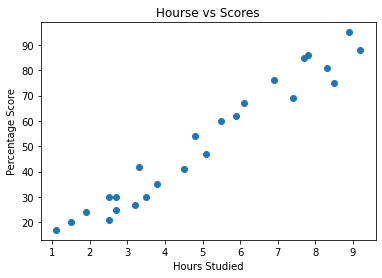

In [21]:
#create basic scatterplot target varible and feature
plt.plot(df['Hours'],df['Scores'],'o')
plt.title('Hourse vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [69]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


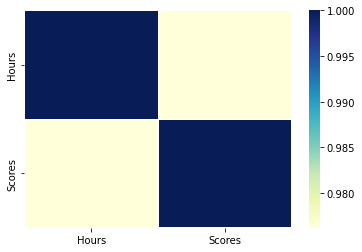

In [71]:
sns.heatmap(df.corr(),cmap ="YlGnBu", linewidths = 0.1)

## As we can see from above abservation there data is linear and positively correlated.

In [23]:
# splitting target variable and feature
x= df.iloc[:,:-1].values
y= df.iloc[:,1].values

In [26]:
x.shape


(25, 1)

In [27]:
y.shape

(25,)

In [59]:
# split data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [60]:
# Training linear model
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 

LinearRegression()

In [64]:
# Predicting Train and Test values
test_pred=lr.predict(x_test)
train_pred= lr.predict(x_train)  

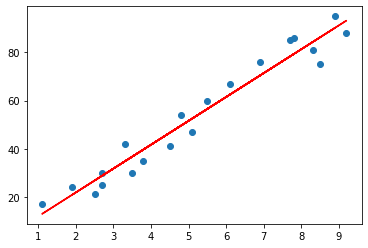

In [74]:
# Plotting for the train data
plt.scatter(x_train, y_train)
plt.plot(x_train, train_pred,color='red')
plt.show()

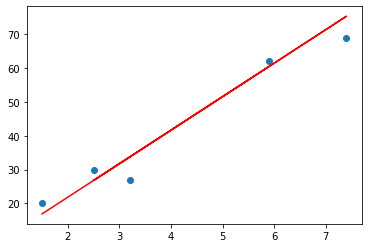

In [75]:
# Plotting for the test data
plt.scatter(x_test, y_test)
plt.plot(x_test, test_pred,color='red')
plt.show()

In [62]:
# data frame of actual value to prredicted value
test = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})  
test 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **Evaluating model**

In [76]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, test_pred)) 

Mean Absolute Error: 4.183859899002982


In [77]:
# model score on train data
r2_score = lr.score(x_train,y_train)
print(r2_score*100,'%')

95.15510725211553 %


In [78]:
# model score on test data
r2_score = lr.score(x_test,y_test)
print(r2_score*100,'%')

94.54906892105353 %


# **Result**

In [86]:
hours = float(input("please Enter number of hours student study= "))

please Enter number of hours student study= 9.25


In [87]:
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(lr.predict([[hours]])))

No of Hours = 9.25
Predicted Score = [93.69173249]


## In this way we can predict on any value and find scores accordingly